In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('diabetic_preprocessed_data.csv')
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   age                       101766 non-null  int64
 3   race_?                    101766 non-null  int64
 4   race_AfricanAmerican      101766 non-null  int64
 5   race_Asian                101766 non-null  int64
 6   race_Caucasian            101766 non-null  int64
 7   race_Hispanic             101766 non-null  int64
 8   race_Other                101766 non-null  int64
 9   gender_Female             101766 non-null  int64
 10  gender_Male               101766 non-null  int64
 11  gender_Unknown/Invalid    101766 non-null  int64
 12  admission_type_id         101766 non-null  int64
 13  discharge_disposition_id  101766 non-null  int64
 14  admission_source_id 

In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop("readmitted", axis=1)  # Features
y = df["readmitted"]  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc)

Accuracy: 0.5875012282598016
Precision: 0.11551528878822197
Recall: 0.40175054704595187
F1 Score: 0.17943706020328382
AUC: 0.5063708737222122


## Bagging Classifier

In [16]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the base logistic regression model
base_model = LogisticRegression()

# Initialize the BaggingClassifier with the logistic regression model as the base estimator
bagging_model = BaggingClassifier(estimator=base_model, random_state=42)

# Fit the BaggingClassifier on the resampled training data
bagging_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc)


Accuracy: 0.5917755723690675
Precision: 0.11581632653061225
Recall: 0.3973741794310722
F1 Score: 0.17935802469135803
AUC: 0.5068668450976824


## HyperTuning Bagging Classifier

In [22]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the base logistic regression model with an increased max_iter value
base_model = LogisticRegression(max_iter=1000)  # Increase max_iter as needed

# Initialize the BaggingClassifier with the logistic regression model as the base estimator
bagging_model = BaggingClassifier(estimator=base_model, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100],
    'max_samples': [0.5],
    'max_features': [0.5]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc)


Best Hyperparameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Accuracy: 0.8865087943401788
Precision: 0.3655913978494624
Recall: 0.01487964989059081
F1 Score: 0.028595458368376788
AUC: 0.5058071944732161


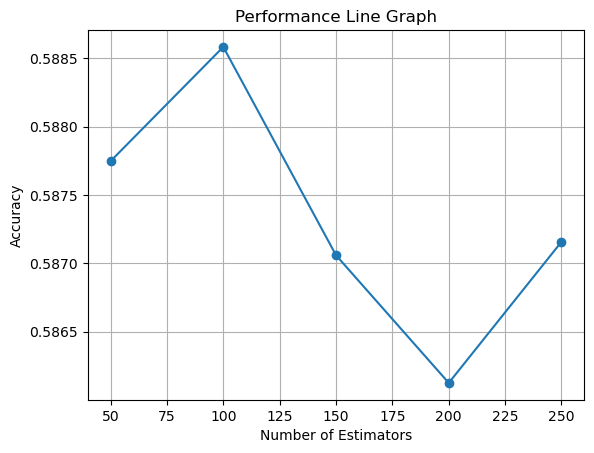

In [27]:
# Define the range of values for the number of estimators
estimators_range = [50, 100, 150, 200, 250]

# Initialize empty lists to store the accuracy values
accuracy_values = []

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Iterate over the range of estimators
for n_estimators in estimators_range:
    # Initialize the base logistic regression model with an increased max_iter value
    base_model = LogisticRegression(max_iter=1000)  # Increase max_iter as needed

    # Initialize the BaggingClassifier with the logistic regression model as the base estimator
    bagging_model = BaggingClassifier(estimator=base_model, n_estimators=n_estimators, random_state=42)

    # Fit the BaggingClassifier on the resampled training data
    bagging_model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = bagging_model.predict(X_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the performance line graph
plt.plot(estimators_range, accuracy_values, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance Line Graph')
plt.grid(True)
plt.show()


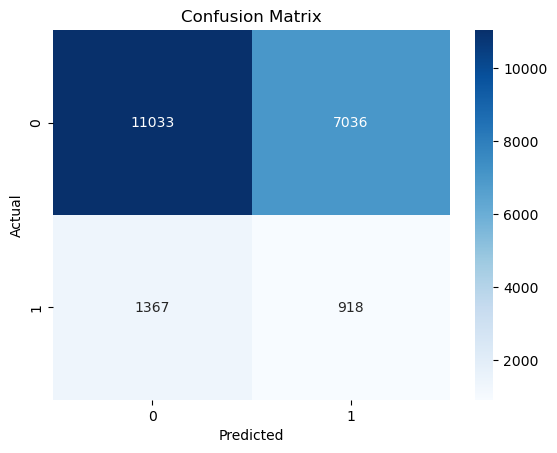

In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the boosting model on the training data
boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred = boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('AUC:', auc)

Accuracy: 0.9244552593739631
Precision: 0.9972340151807539
Recall: 0.8521877748460862
F1 Score: 0.9190230600509811
AUC: 0.9248975820591436


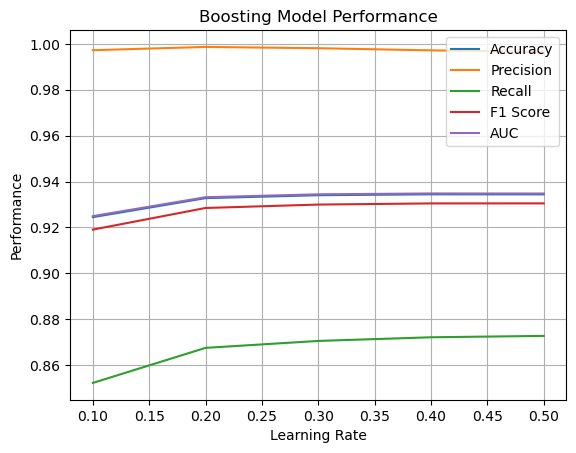

In [10]:
# Define the list of learning rates to evaluate
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize empty lists to store the performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# Iterate over the learning rates
for learning_rate in learning_rates:
    # Initialize the Gradient Boosting classifier
    boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, random_state=42)
    
    # Fit the boosting model on the training data
    boosting_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = boosting_model.predict(X_test)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append the performance metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(auc)

# Plot the performance line graph
plt.plot(learning_rates, accuracy_scores, label='Accuracy')
plt.plot(learning_rates, precision_scores, label='Precision')
plt.plot(learning_rates, recall_scores, label='Recall')
plt.plot(learning_rates, f1_scores, label='F1 Score')
plt.plot(learning_rates, auc_scores, label='AUC')
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.title('Boosting Model Performance')
plt.legend()
plt.grid(True)
plt.show()

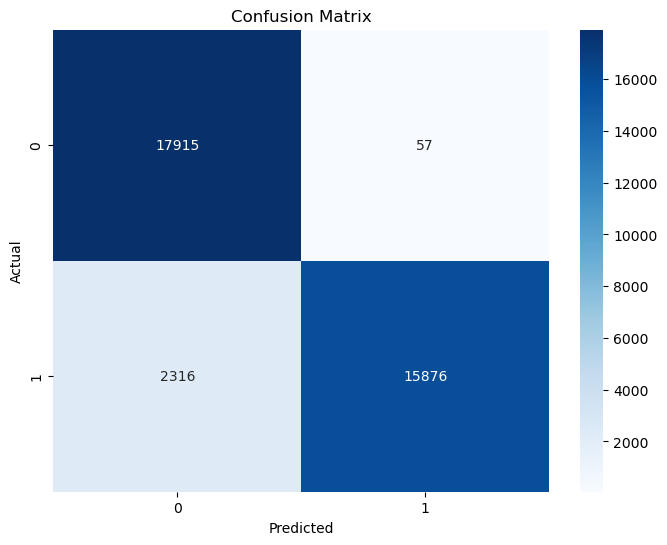

In [14]:
# Fit the boosting model on the training data
boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred = boosting_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
